## Importing required libraries

In [244]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
# import cv2

## Load the data

In [245]:
def load_csv():
    return pd.read_csv('Video_Games_Sales.csv')

## Accessing the dataframe

In [246]:
df = load_csv()
df.head()
# Number of Attributes in the Dataset: 16 Attributes
# NAME- Name of the video Game
# PLATFORM- Console on which the game is available
# YEAR_OF_RELEASE- Year in which it was released
# GENRE- Game's Category
# PUBLISHER- The company under which the game has been released
# NA_SALES- Game sales in North America (in millions of units)
# EU SALES- Game sales in European Union (in millions of units)
# JP_SALES- Game sales in Japan (in millions of units)
# OTHER_SALES- Game sales in the rest of the world, i.e. Africa, Asia 
# excluding Japan,Europe excluding the E.U. 
# GLOBAL_SALES- Total sales in the world (in millions of units)
# CRITIC_SCORE- Average Score given by professional critics
# CRITIC_COUNT- Number of Critics that Scored the game
# USER_SCORE- Average Score given by users
# USER_COUNT- Number of Users that Scored the game
# DEVELOPER- Developing company of the game 
# RATING- Suitable target audience rating; E(Everyone), E10+(Everyone 10+), T(Teen 13+), M(Mature +17)
#

,Name,Platform,Year_of_Release,Genre,Genre_Identifier,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Developer_Identifier,Rating,Sales Category
0,Mario Kart Wii,Wii,2008.0,Racing,5,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,Nintendo,E,MEDIUM
1,Wii Sports Resort,Wii,2009.0,Sports,2,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,Nintendo,E,MEDIUM
2,New Super Mario Bros.,DS,2006.0,Platform,6,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,Nintendo,Nintendo,E,MEDIUM
3,Wii Play,Wii,2006.0,Misc,7,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,Nintendo,E,MEDIUM
4,New Super Mario Bros. Wii,Wii,2009.0,Platform,6,Nintendo,14.44,6.94,4.70,2.24,28.32,87,80,8.4,594,Nintendo,Nintendo,E,MEDIUM


## Get information about the dataframe

In [247]:
df.info()
# Year_of_Release has 78 missing values
# Publisher has 4 missing values
# Developer has 4 missing values
# Rating has 70 missing
#
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  7015 non-null   object 
 1   Platform              7015 non-null   object 
 2   Year_of_Release       6937 non-null   float64
 3   Genre                 7015 non-null   object 
 4   Genre_Identifier      7015 non-null   int64  
 5   Publisher             7011 non-null   object 
 6   NA_Sales              7015 non-null   float64
 7   EU_Sales              7015 non-null   float64
 8   JP_Sales              7015 non-null   float64
 9   Other_Sales           7015 non-null   float64
 10  Global_Sales          7015 non-null   float64
 11  Critic_Score          7015 non-null   int64  
 12  Critic_Count          7015 non-null   int64  
 13  User_Score            7015 non-null   float64
 14  User_Count            7015 non-null   int64  
 15  Developer            

In [248]:
df["Genre"].value_counts()
# The value-counts() method gives the count of each catagory present in the attribute

Action          1676
Sports           972
Shooter          886
Role-Playing     721
Racing           598
Platform         407
Misc             396
Fighting         383
Simulation       306
Strategy         284
Adventure        265
Puzzle           121
Name: Genre, dtype: int64

In [249]:
df["Year_of_Release"].value_counts()

2008.0    600
2007.0    596
2005.0    566
2009.0    555
2006.0    530
2003.0    505
2004.0    480
2011.0    475
2002.0    459
2010.0    433
2012.0    321
2013.0    273
2001.0    257
2014.0    256
2016.0    227
2015.0    221
2000.0    102
1999.0     30
1998.0     26
1997.0     14
1996.0      7
1994.0      1
1985.0      1
1992.0      1
1988.0      1
Name: Year_of_Release, dtype: int64

In [250]:
df.describe()

,Year_of_Release,Genre_Identifier,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6937.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000
mean,2007.478881,4.332288,0.383368,0.229024,0.062432,0.080344,0.755356,70.246757,28.781611,7.182124,172.929865
std,4.229659,3.150182,0.822682,0.586329,0.280733,0.247195,1.677092,13.881181,19.167584,1.441327,580.657893
min,1985.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,2.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,3.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,24.000000,7.500000,27.000000
75%,2011.000000,7.000000,0.390000,0.210000,0.010000,0.070000,0.740000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,12.000000,15.680000,12.760000,6.500000,10.570000,35.520000,98.000000,113.000000,9.600000,10665.000000


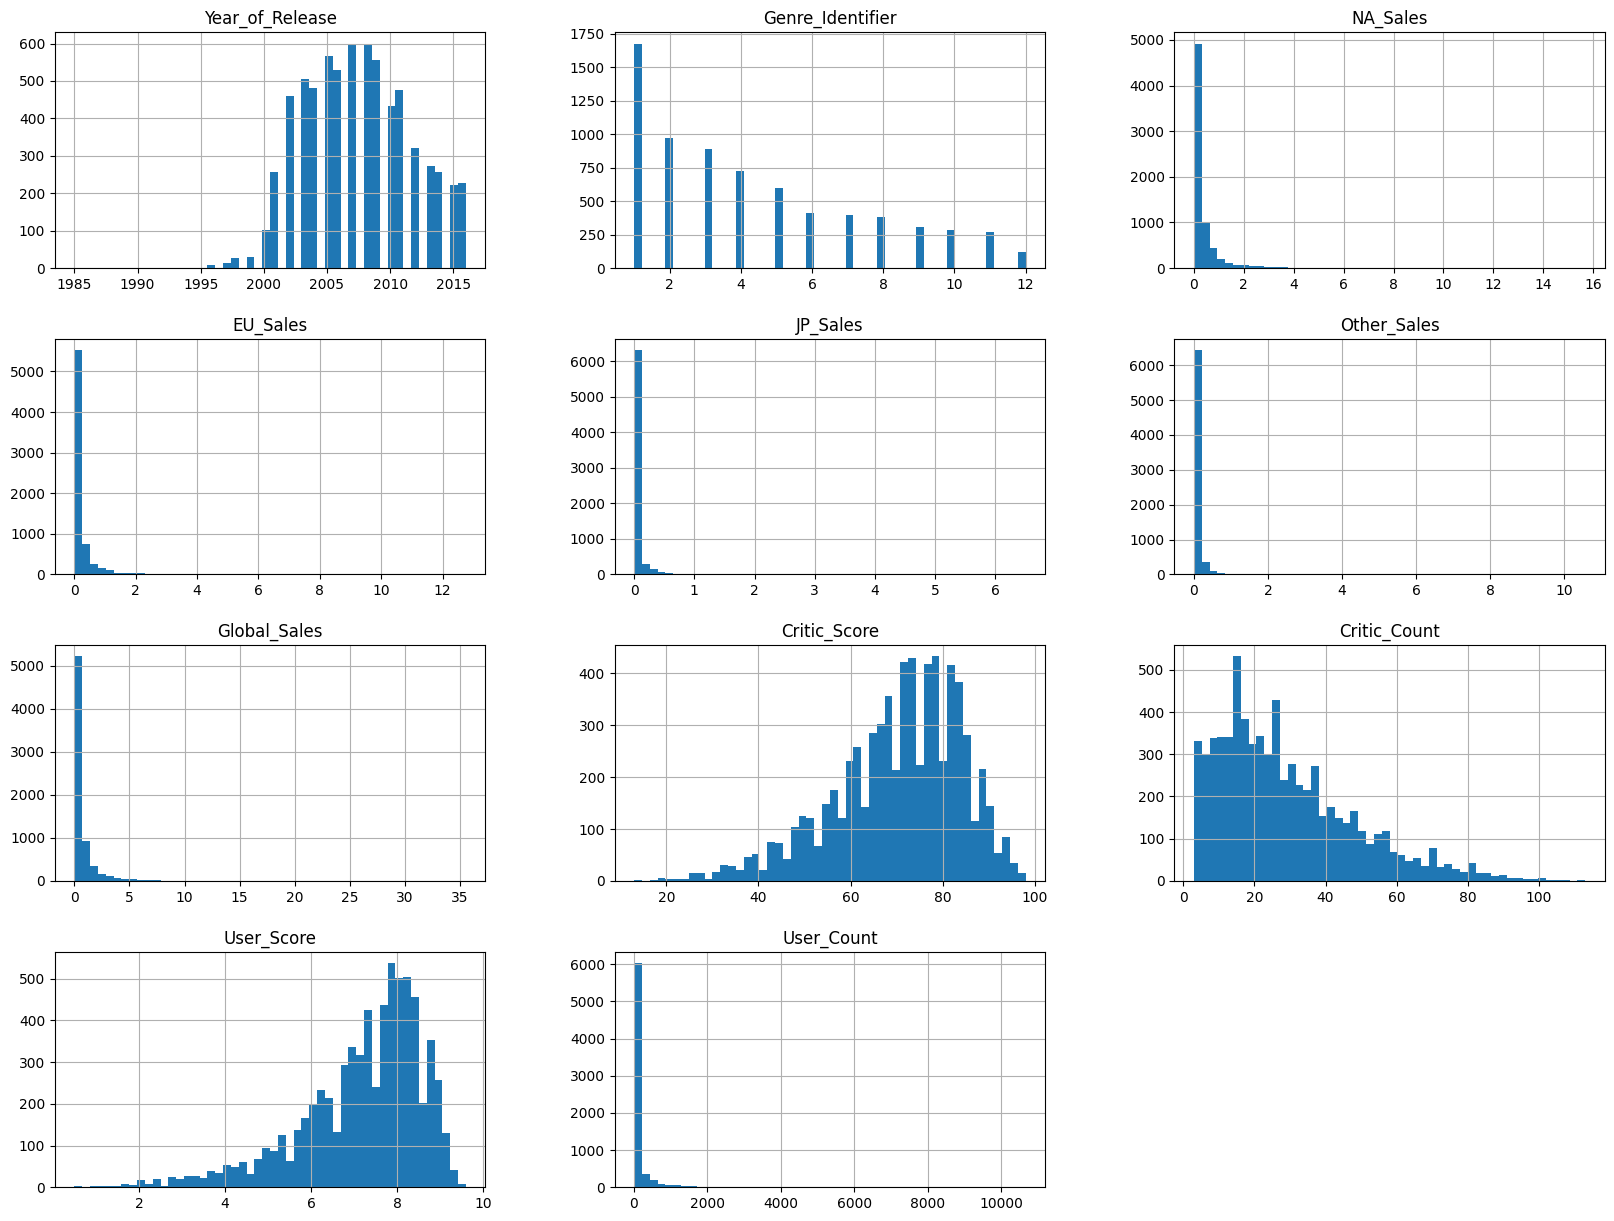

In [251]:
df.hist(bins=50, figsize=(20,15))
plt.show()
# The year of release with the most unit sales is 2008 with 600 million units,
# followed by 2007 with 596 million units and 1988, 1985, 1992, 1994 with the lowest at 1 million units each
# 
#
#
#

<AxesSubplot: xlabel='NA_Sales', ylabel='Year_of_Release'>

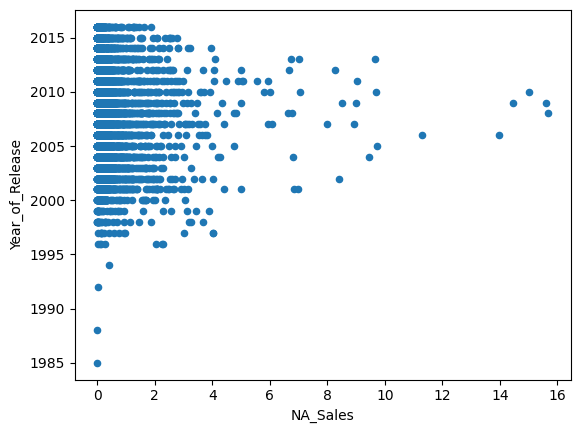

In [252]:
df.plot(kind="scatter", x="NA_Sales", y="Year_of_Release")

##  Visualizing Geographical Data

<AxesSubplot: xlabel='JP_Sales', ylabel='Genre'>

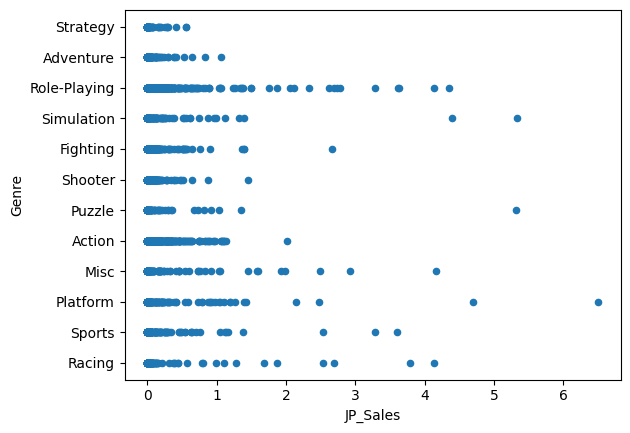

In [253]:
df.plot(kind="scatter", x="JP_Sales", y="Genre")

<AxesSubplot: xlabel='EU_Sales', ylabel='Genre'>

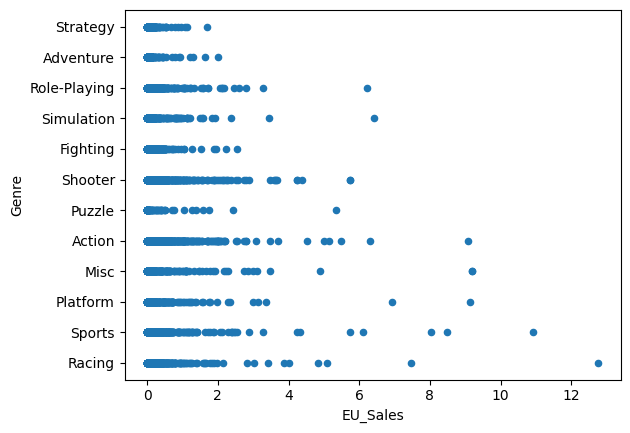

In [254]:
df.plot(kind="scatter", x="EU_Sales", y="Genre")

<AxesSubplot: xlabel='Other_Sales', ylabel='Genre'>

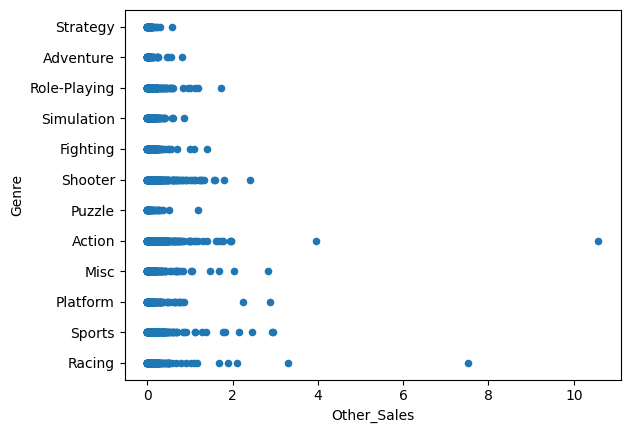

In [255]:
df.plot(kind="scatter", x="Other_Sales", y="Genre")

<AxesSubplot: xlabel='Global_Sales', ylabel='Genre'>

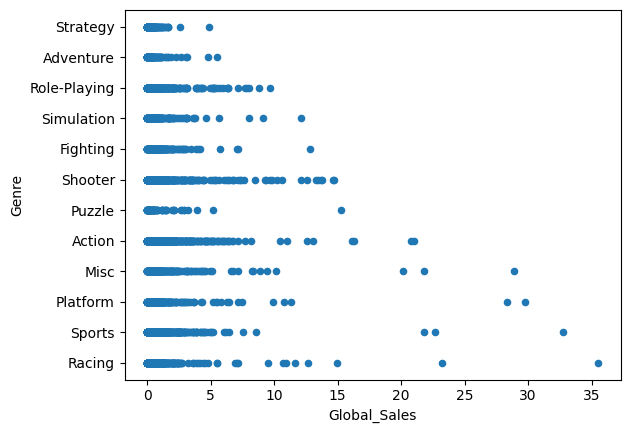

In [256]:
df.plot(kind="scatter", x="Global_Sales", y="Genre")

<AxesSubplot: xlabel='Global_Sales', ylabel='Genre'>

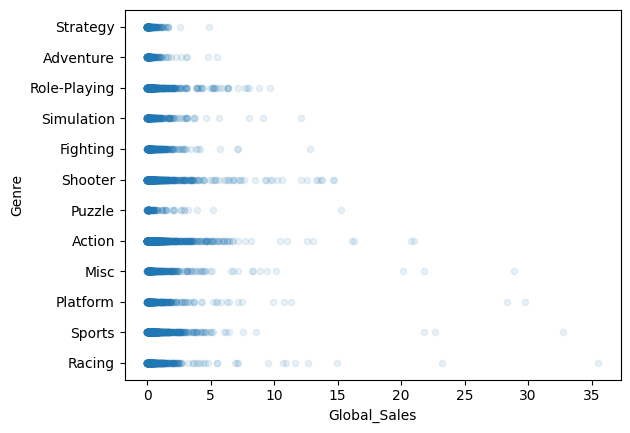

In [257]:
df.plot(kind="scatter", x="Global_Sales", y="Genre", alpha=0.1)

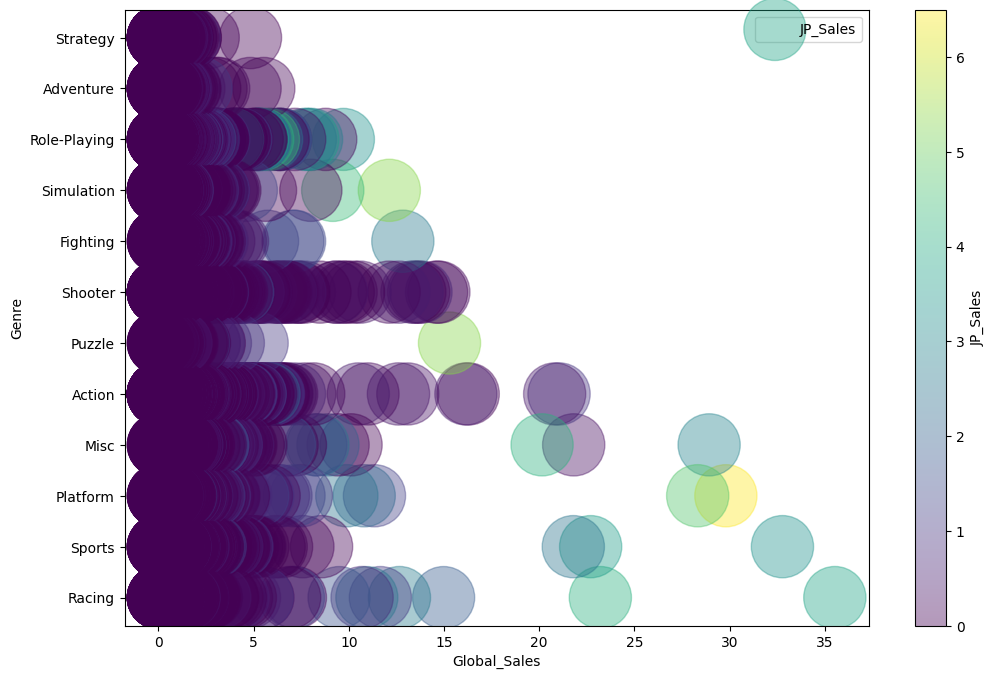

In [258]:
df.plot(kind="scatter", x="Global_Sales", y="Genre", alpha=0.4,
    s=df["Year_of_Release"], label= "JP_Sales",figsize=(12,8),
    c="JP_Sales", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## Top Ten Best Selling Games Regionally 

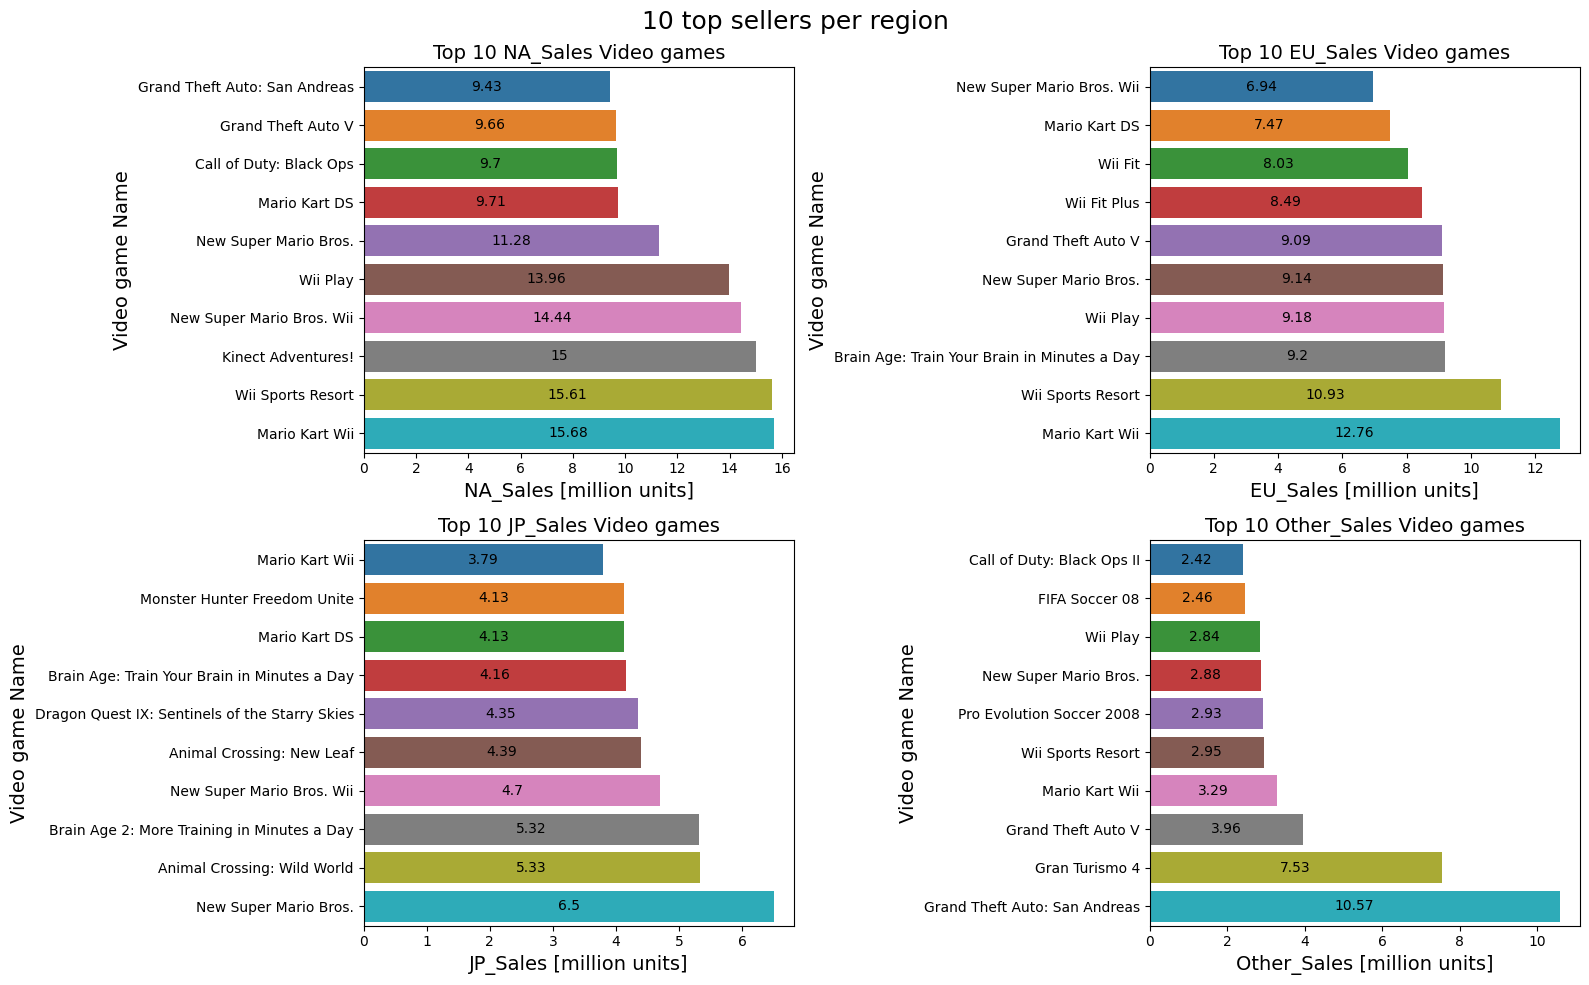

In [259]:
sales_regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
fig,axes = plt.subplots(int(len(sales_regions)/2),int(len(sales_regions)/2), figsize=(16,10))
axes = axes.ravel() #Required for array typing ???
for index, region in enumerate(sales_regions):
    data_sales_sort = df.sort_values(by=region, ascending=True)
    sns.barplot(x=data_sales_sort[region].tail(10),y=data_sales_sort['Name'].tail(10), ax=axes[index])
    axes[index].set_title(f'Top 10 {region} Video games', fontsize = 14)
    axes[index].set_xlabel(f'{region} [million units]', fontsize = 14)
    axes[index].set_ylabel('Video game Name', fontsize = 14)
    axes[index].bar_label(axes[index].containers[0], label_type='center')
    
plt.suptitle('10 top sellers per region', fontsize = 18)
plt.tight_layout()
plt.show()

# Shayma's Done

# Code from "https://www.kaggle.com/code/baptisteadn/a-brief-analysis-of-video-games-sales/notebook"

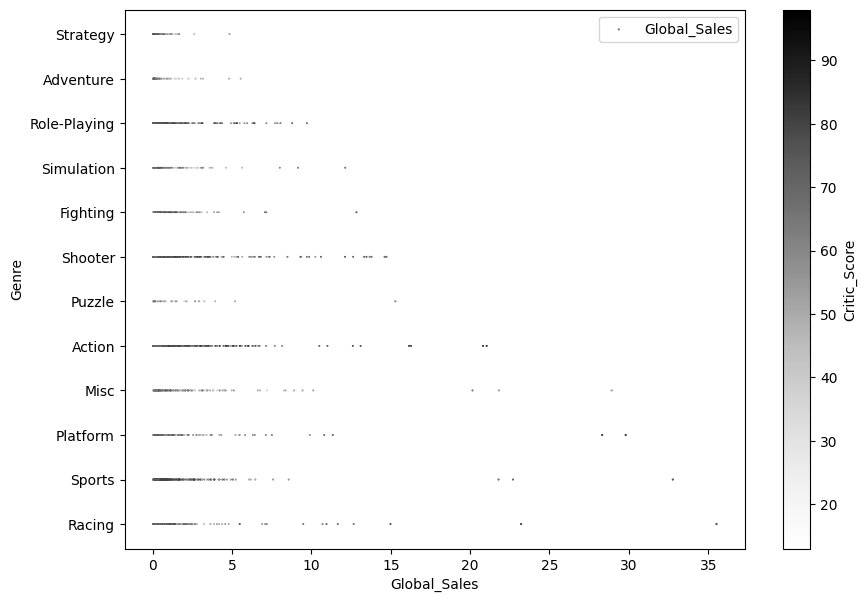

In [260]:
df.plot(kind="scatter", x="Global_Sales", y="Genre",
    s=df["Global_Sales"]/100, label="Global_Sales", figsize=(10,7),
    c="Critic_Score", colorbar=True,
)
plt.legend()

In [261]:
corr_matrix = df.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

C:\Users\sadiq\AppData\Local\Temp\ipykernel_29340\1132132967.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes


In [262]:
corr_matrix["Global_Sales"].sort_values(ascending=False)

Global_Sales        1.000000
NA_Sales            0.940150
EU_Sales            0.917793
Other_Sales         0.768777
JP_Sales            0.625747
Critic_Count        0.326750
User_Count          0.303067
Critic_Score        0.271305
User_Score          0.098545
Year_of_Release     0.004911
Genre_Identifier   -0.043773
Name: Global_Sales, dtype: float64

array([[<AxesSubplot: xlabel='Global_Sales', ylabel='Global_Sales'>,
        <AxesSubplot: xlabel='JP_Sales', ylabel='Global_Sales'>,
        <AxesSubplot: xlabel='Genre_Identifier', ylabel='Global_Sales'>,
        <AxesSubplot: xlabel='Year_of_Release', ylabel='Global_Sales'>],
       [<AxesSubplot: xlabel='Global_Sales', ylabel='JP_Sales'>,
        <AxesSubplot: xlabel='JP_Sales', ylabel='JP_Sales'>,
        <AxesSubplot: xlabel='Genre_Identifier', ylabel='JP_Sales'>,
        <AxesSubplot: xlabel='Year_of_Release', ylabel='JP_Sales'>],
       [<AxesSubplot: xlabel='Global_Sales', ylabel='Genre_Identifier'>,
        <AxesSubplot: xlabel='JP_Sales', ylabel='Genre_Identifier'>,
        <AxesSubplot: xlabel='Genre_Identifier', ylabel='Genre_Identifier'>,
        <AxesSubplot: xlabel='Year_of_Release', ylabel='Genre_Identifier'>],
       [<AxesSubplot: xlabel='Global_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot: xlabel='JP_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot

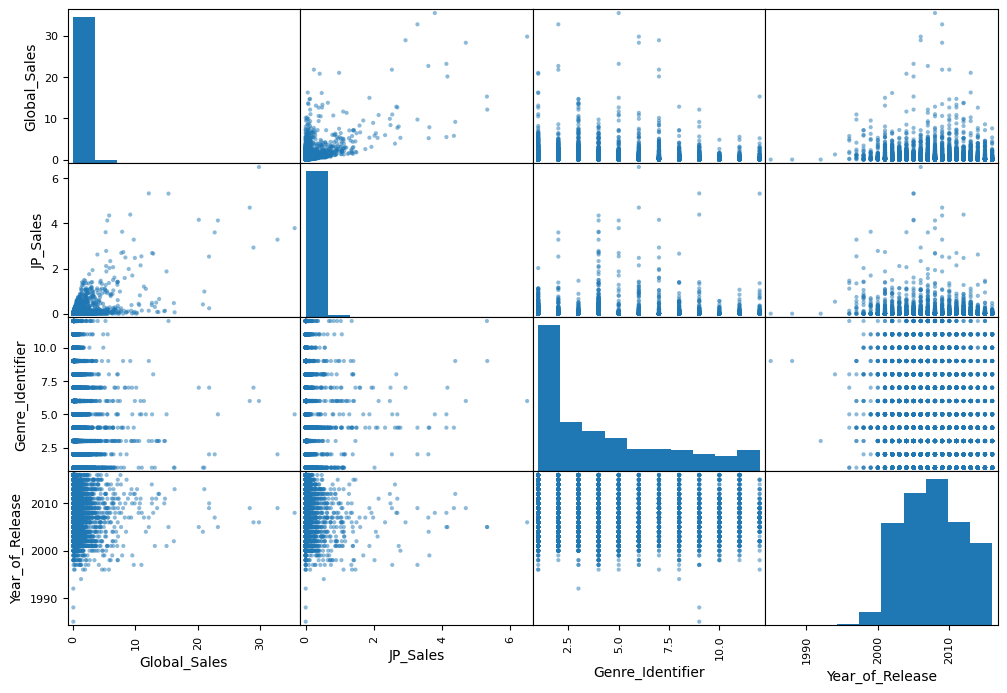

In [263]:
from pandas.plotting import scatter_matrix

attributes = ["Global_Sales", "JP_Sales", "Genre_Identifier", "Year_of_Release"]
scatter_matrix(df[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Racing'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Platform'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Puzzle'),
  Text(6, 0, 'Shooter'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Role-Playing'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

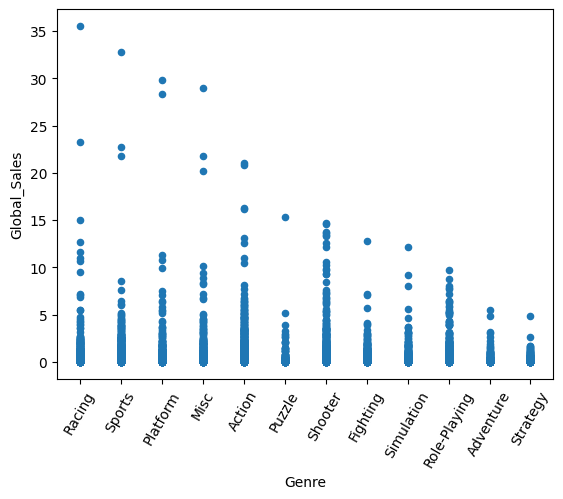

In [264]:
df.plot(kind="scatter", x="Genre", y="Global_Sales")
plt.xticks(rotation=60)

array([[<AxesSubplot: xlabel='Global_Sales', ylabel='Global_Sales'>,
        <AxesSubplot: xlabel='Critic_Score', ylabel='Global_Sales'>,
        <AxesSubplot: xlabel='Year_of_Release', ylabel='Global_Sales'>],
       [<AxesSubplot: xlabel='Global_Sales', ylabel='Critic_Score'>,
        <AxesSubplot: xlabel='Critic_Score', ylabel='Critic_Score'>,
        <AxesSubplot: xlabel='Year_of_Release', ylabel='Critic_Score'>],
       [<AxesSubplot: xlabel='Global_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot: xlabel='Critic_Score', ylabel='Year_of_Release'>,
        <AxesSubplot: xlabel='Year_of_Release', ylabel='Year_of_Release'>]],
      dtype=object)

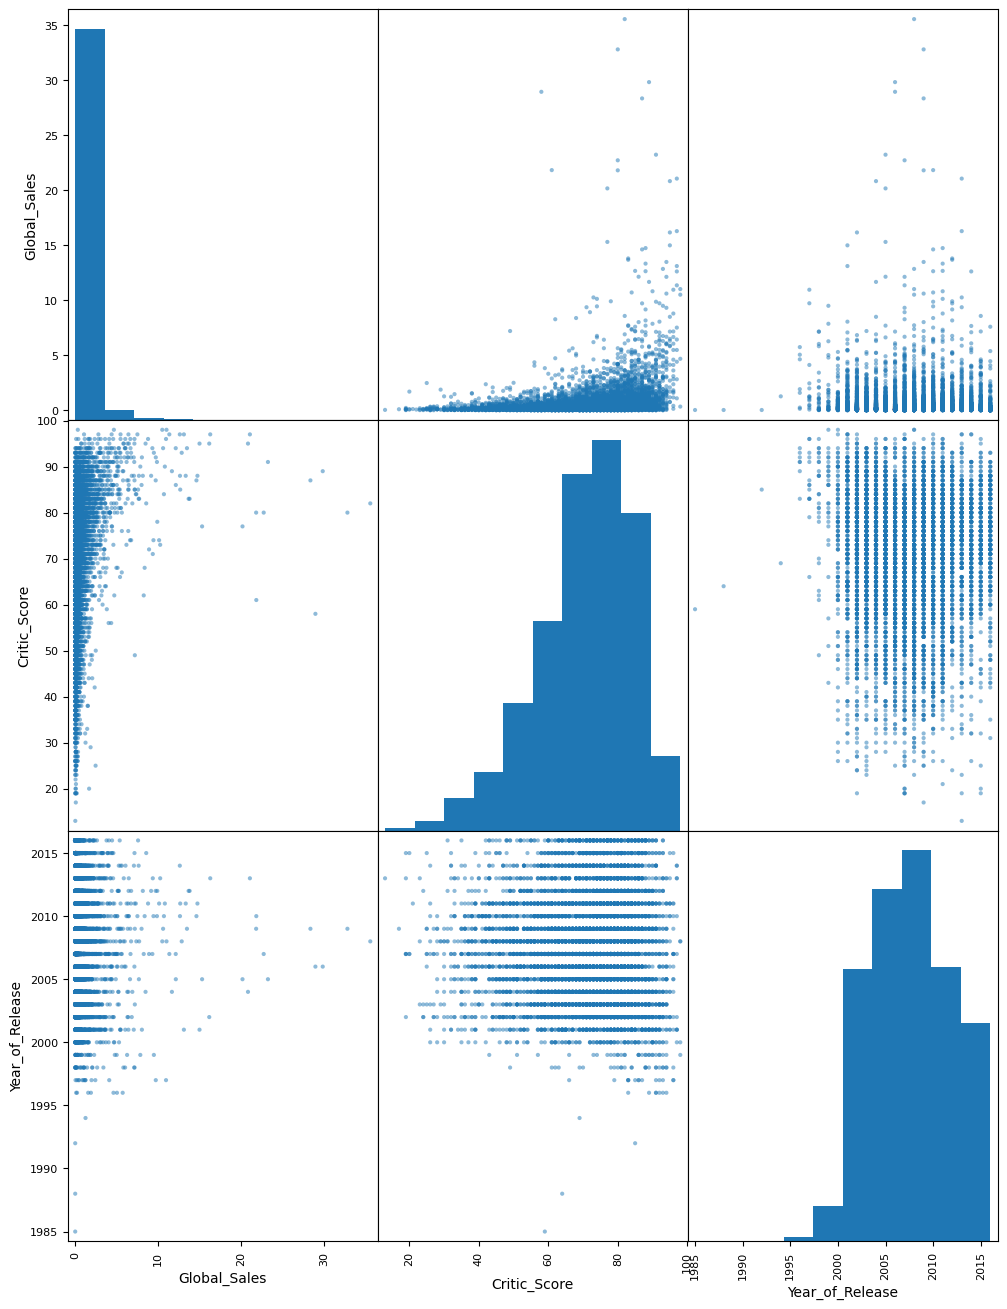

In [265]:
a=['Global_Sales', 'Critic_Score', 'Year_of_Release']
scatter_matrix(df[a], figsize=(12, 16))

## Data Cleaning

In [266]:
df[df.isnull().any(axis=1)]

,Name,Platform,Year_of_Release,Genre,Genre_Identifier,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Developer_Identifier,Rating,Sales Category
548,R4: Ridge Racer Type 4,PS,1998.0,Racing,5,Namco Bandai Games,0.68,0.46,0.79,0.13,2.06,88,18,9.2,21,Namco,Namco,NaN,LOW
1136,Football Manager 2013,PC,2012.0,Sports,2,Sega,0.00,0.95,0.00,0.21,1.15,86,37,6.7,228,Sports Interactive,Sports Interactive,NaN,LOW
1320,Monster Rancher,PS,1997.0,Simulation,9,Tecmo Koei,0.12,0.08,0.74,0.07,1.01,86,5,8.3,10,Tecmo,Tecmo,NaN,LOW
1939,100 Classic Books,DS,2008.0,Misc,7,Nintendo,0.12,0.52,0.00,0.02,0.66,70,7,6.0,12,Genius Sonority Inc.,Genius Sonority Inc.,NaN,LOW
2562,Sonic the Hedgehog,PS3,2006.0,Platform,6,NaN,0.00,0.48,0.00,0.00,0.48,43,17,4.1,176,Sonic Team,Sonic Team,E10+,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,Root Letter,PS4,2016.0,Adventure,11,PQube,0.00,0.00,0.01,0.00,0.01,69,13,7.5,11,Kadokawa,Kadokawa,NaN,LOW
6983,Colin McRae Rally 04,PC,2004.0,Racing,5,Codemasters,0.00,0.01,0.00,0.00,0.01,87,6,7.2,44,Codemasters,Codemasters,NaN,LOW
6984,Virtua Quest,GC,NaN,Role-Playing,4,Unknown,0.01,0.00,0.00,0.00,0.01,55,19,5.5,12,Artificial Mind and Movement,Artificial Mind and Movement,T,LOW
7008,Prison Architect,XOne,2016.0,Action,1,Introversion Software,0.01,0.00,0.00,0.00,0.01,74,13,6.7,7,Introversion Double Eleven,Introversion Double Eleven,NaN,LOW


In [267]:
df.dropna(subset=["Year_of_Release","Publisher","Developer","Rating"],inplace=True)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6866 entries, 0 to 7013
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  6866 non-null   object 
 1   Platform              6866 non-null   object 
 2   Year_of_Release       6866 non-null   float64
 3   Genre                 6866 non-null   object 
 4   Genre_Identifier      6866 non-null   int64  
 5   Publisher             6866 non-null   object 
 6   NA_Sales              6866 non-null   float64
 7   EU_Sales              6866 non-null   float64
 8   JP_Sales              6866 non-null   float64
 9   Other_Sales           6866 non-null   float64
 10  Global_Sales          6866 non-null   float64
 11  Critic_Score          6866 non-null   int64  
 12  Critic_Count          6866 non-null   int64  
 13  User_Score            6866 non-null   float64
 14  User_Count            6866 non-null   int64  
 15  Developer            

In [269]:
df_head = df[["Genre"]]
df_head.head(10)

,Genre
0,Racing
1,Sports
2,Platform
3,Misc
4,Platform
5,Racing
6,Sports
7,Misc
8,Sports
9,Action


In [270]:
df["Developer_Identifier"]

0                 Nintendo
1                 Nintendo
2                 Nintendo
3                 Nintendo
4                 Nintendo
               ...        
7009         Fluid Studios
7010       Criterion Games
7011    Kojima Productions
7012          Atomic Games
7013                SimBin
Name: Developer_Identifier, Length: 6866, dtype: object

In [271]:
df["Developer_Identifier"].value_counts()

EA Canada                  152
EA Sports                  144
Capcom                     126
Ubisoft                    103
Konami                      95
                          ... 
SCEA Think and Feel          1
Ubisoft Annecy               1
Omega Force Koei Canada      1
Sega Tom Create              1
Atomic Games                 1
Name: Developer_Identifier, Length: 1290, dtype: int64

In [273]:

setdev = list(set(df["Developer_Identifier"]))

# for i in range(1290):
#     setdev[i] = i

# setdev

dictionary = dict(zip(setdev, range(1290)))
dictionary

{'Global A': 0,
 'Yager': 1,
 '5pb': 2,
 'Rocksteady Studios Iron Galaxy Studios': 3,
 'Epic Games People Can Fly': 4,
 'Mistwalker Artoon': 5,
 'Irrational Games 2K Marin': 6,
 'AWE Games': 7,
 'Infinite Interactive': 8,
 'Awesome Play Ltd.': 9,
 'Stormfront Studios': 10,
 'Big Huge Games': 11,
 'Naughty Dog': 12,
 'Now Production': 13,
 'Monolith Soft Banpresto': 14,
 '3d6 Games': 15,
 'Happy Happening': 16,
 'Factor 5': 17,
 'Arc System Works': 18,
 'Nippon Ichi Software': 19,
 'Namco Bandai Games America': 20,
 'Iron Lore Entertainment': 21,
 'DC Studios': 22,
 'Gas Powered Games': 23,
 'ImaginEngine': 24,
 'IR Gurus Interactive Ltd.': 25,
 'Black Lantern Studios': 26,
 'Spellbound': 27,
 'Double Fine Productions': 28,
 'Epics': 29,
 'Playground Games': 30,
 'Battlefront.com 1C 1C Company': 31,
 'Hudson Entertainment': 32,
 'Sanzaru Games': 33,
 'Triumph Studios': 34,
 'David A. Palmer Productions': 35,
 'Trion Worlds': 36,
 'Pocketeers': 37,
 'Cunning Developments': 38,
 'Infinite

In [274]:
df.Developer_Identifier = [dictionary[item] for item in df.Developer_Identifier]

df.Developer_Identifier

0       1264
1       1264
2       1264
3       1264
4       1264
        ... 
7009     400
7010     280
7011    1070
7012    1136
7013     444
Name: Developer_Identifier, Length: 6866, dtype: int64

## Getting started with sklearn

In [277]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Genre_Identifier,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Developer_Identifier,Rating,Sales Category
7009,E.T. The Extra-Terrestrial,GBA,2001.0,Action,1,NewKidCo,0.01,0.00,0.0,0.0,0.01,46,4,2.4,21,Fluid Studios,400,E,LOW
7010,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,8,Midway Games,0.01,0.00,0.0,0.0,0.01,81,12,8.8,9,Criterion Games,280,M,LOW
7011,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,1,Konami Digital Entertainment,0.00,0.01,0.0,0.0,0.01,80,20,7.6,412,Kojima Productions,1070,M,LOW
7012,Breach,PC,2011.0,Shooter,3,Destineer,0.01,0.00,0.0,0.0,0.01,61,12,5.8,43,Atomic Games,1136,T,LOW
7013,STORM: Frontline Nation,PC,2011.0,Strategy,10,Unknown,0.00,0.01,0.0,0.0,0.01,60,12,7.2,13,SimBin,444,E10+,LOW


In [279]:
df.to_csv('Video_Games_Sales.csv')

In [87]:
X, y = df["Name"], df["Platform"]
X.shape

(6868,)